# Solution of parts c and d of question number 1

In [1]:
import math
import numpy as np
from scipy.stats import norm

<b>Swap rate of interest rate swap

In [2]:
a=0.3
b=0.05
sigma=0.03
r0=0.08
t=0

In [3]:
#Calculating zero coupon price for maturity 1-year,2-year,.....and 5-year, one by one 
for T in range(1,6):
    B= (1-math.exp(-1*a*(T-t)))/a
    A= math.exp((((B-T+t)*((a*a*b)-(sigma*sigma/2)))/(a*a))-((sigma*sigma*B*B)/(4*a)))
    P=A*math.exp(-B*r0)
    print("P(0,%0.0f)="%T,np.round(P,4))

P(0,1)= 0.927
P(0,2)= 0.8656
P(0,3)= 0.8129
P(0,4)= 0.7667
P(0,5)= 0.7257


In [4]:
#If Z(i) be the zero coupon price for maturity i,from the above outputs, we have Z(1)=0.927, Z(2)=0.8656, Z(3)=0.8129, 
# Z(4)=0.7667, Z(5)=0.7257.
#The swap rate of an interest rate swap that has a maturity of 5 years = (1-Z(5))/(Z(1)+Z(2)+....+Z(5))

In [5]:
Z_1= 0.927
Z_2= 0.8656
Z_3= 0.8129
Z_4= 0.7667
Z_5= 0.7257

In [6]:
S=(1-Z_5)/(Z_1+Z_2+Z_3+Z_4+Z_5)
print("The swap rate is",np.round(S,4))

The swap rate is 0.0669


<b>Price of European Call option on zero coupon bond

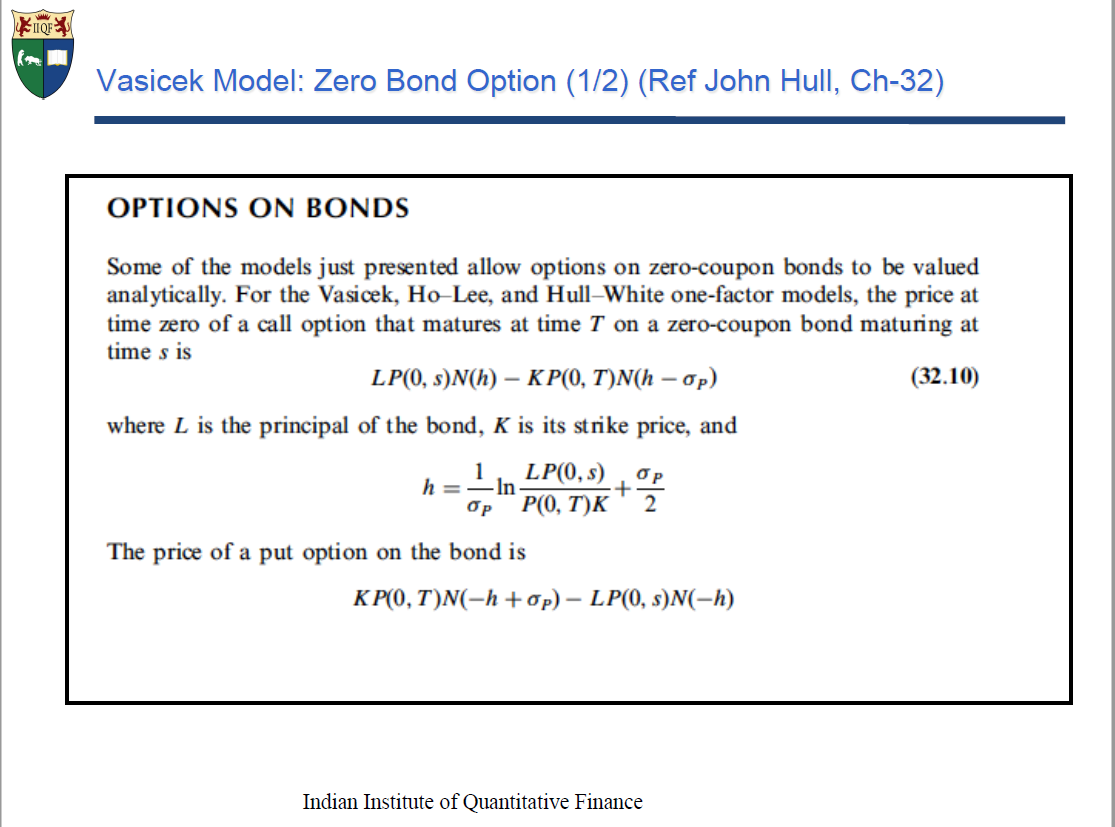

In [7]:
#Here,
s=5
T=4
L=1000
K=900
#P(0,4)=0.7667, P(0,5)=0.7257(both calculated above). Let P_04=P(0,4) and P_05=P(0,5) so that
P_04= 0.7667
P_05= 0.7257

In [8]:
SIGMAp= (sigma/a)*(1-math.exp(-a*(s-T)))*math.sqrt((1-math.exp(-2*a*T))/(2*a))
print(SIGMAp)

0.031906425307141974


In [9]:
h=(1/SIGMAp)*math.log((L*P_05)/(P_04*K))+(SIGMAp/2)
print(h)

1.5956234794379451


In [10]:
x=(L*P_05*norm.cdf(h))-(K*P_04*norm.cdf(h-SIGMAp))
print("Price of this European Call option is",np.round(x,4))

Price of this European Call option is 36.2204
